In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [3]:
tickers = tickers.Symbol.to_list()

In [4]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

In [5]:
tickers = [i.replace(".","-") for i in tickers]

In [6]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

In [7]:
def RSI_calc(asset):
    df = yf.download(asset, start = "2011-01-01") #getting the ticker data from yf
    df["MA200"] = df['Adj Close'].rolling(window=200).mean()
    df["Price change"] = df["Adj Close"].pct_change()
    df["Upmove"] = df["Price change"].apply(lambda x: x if x> 0 else 0)
    df["Downmove"] = df["Price change"].apply(lambda x: abs(x) if x < 0 else 0)
    df["Avg Up"] = df["Upmove"].ewm(span=19).mean()
    df["Avg Down"] = df["Downmove"].ewm(span=19).mean()
    df = df.dropna()
    df["RS"] = df["Avg Up"]/df["Avg Down"]
    df["RSI"] = df["RS"].apply(lambda x: 100- (100/(x+1)))
    df.loc[(df["Adj Close"]> df["MA200"]) & (df["RSI"]<30), "BUY"] = "YES"
    df.loc[(df["Adj Close"] < df["MA200"]) | (df["RSI"]>30), "BUY"] = "NO"
    return df

In [8]:
RSI_calc(tickers[0])

[*********************100%***********************]  1 of 1 completed


<ipython-input-7-70009bb15622>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RS"] = df["Avg Up"]/df["Avg Down"]
<ipython-input-7-70009bb15622>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RSI"] = df["RS"].apply(lambda x: 100- (100/(x+1)))
/Users/Andrew/miniforge3/envs/tf_m1/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Open,High,Low,Close,Adj Close,Volume,MA200,Price change,Upmove,Downmove,Avg Up,Avg Down,RS,RSI,BUY
Date,,,,,,,,,,,,,,,
2011-10-17,78.629997,79.050003,75.660004,75.879997,57.199223,4359500,66.024225,-0.038154,0.000000,0.038154,0.010029,0.010096,0.993424,49.835049,NO
2011-10-18,76.180000,79.150002,75.709999,78.360001,59.068657,4167200,65.998478,0.032683,0.032683,0.000000,0.012295,0.009086,1.353120,57.503229,NO
2011-10-19,78.260002,78.860001,77.269997,77.699997,58.571159,3865000,65.970687,-0.008422,0.000000,0.008422,0.011065,0.009020,1.226771,55.091929,NO
2011-10-20,77.769997,79.059998,77.110001,78.680000,59.309910,4087300,65.946589,0.012613,0.012613,0.000000,0.011220,0.008118,1.382143,58.020992,NO
2011-10-21,79.379997,80.559998,78.980003,80.480003,60.666767,5125200,65.931237,0.022877,0.022877,0.000000,0.012386,0.007306,1.695271,62.897986,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,184.089996,185.039993,182.899994,183.309998,181.830246,1463400,188.034532,-0.001906,0.000000,0.001906,0.004298,0.003097,1.387783,58.120146,NO
2021-11-16,183.309998,184.199997,182.699997,183.369995,181.889755,1975000,188.095803,0.000327,0.000327,0.000000,0.003901,0.002787,1.399525,58.325081,NO
2021-11-17,183.369995,183.869995,181.630005,183.339996,181.860001,2251100,188.154697,-0.000164,0.000000,0.000164,0.003511,0.002525,1.390457,58.167002,NO


In [9]:
def get_signals(df):
    """Getting buying and selling dates"""
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df)):
        if "YES" in df["BUY"].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11):
                if df["RSI"].iloc[i+j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j ==10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    return Buying_dates, Selling_dates    
                    

In [10]:
frame = RSI_calc(tickers[0])
buy,sell = get_signals(frame)

[*********************100%***********************]  1 of 1 completed


<ipython-input-7-70009bb15622>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RS"] = df["Avg Up"]/df["Avg Down"]
<ipython-input-7-70009bb15622>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RSI"] = df["RS"].apply(lambda x: 100- (100/(x+1)))
/Users/Andrew/miniforge3/envs/tf_m1/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

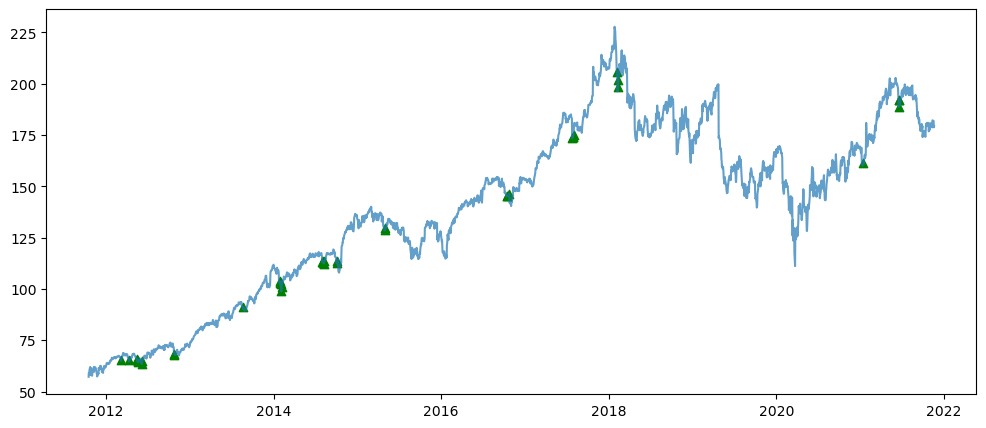

In [11]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]["Adj Close"], marker= "^", c="g")
plt.plot(frame["Adj Close"], alpha=0.7)
plt.show()

In [13]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [15]:
print(Profits)

[ 0.01841858  0.01323802 -0.0115183  -0.01105814  0.00212315  0.01287556
  0.03632401  0.02847867  0.01033357  0.01558087  0.01012236 -0.00346098
  0.00108178 -0.00407378  0.02345979  0.01052883  0.02759942  0.00556546
  0.00556546  0.01286469  0.0062834   0.01170129  0.01861865  0.01306246
  0.0130085   0.01320242 -0.00076654  0.00355307 -0.01841872  0.01366927
  0.02033747  0.01195283  0.01595001  0.00852711  0.02154845  0.00861573
  0.01892706 -0.0052846   0.01409035  0.01120925]


In [17]:
wins = [i for i in Profits if i >0]

In [18]:
len(wins)/len(Profits)

0.825